In [0]:
from google.colab import drive
drive.mount('/content/drive')

#**Part 1 - Data gathering and feature engineering**


**Libraries**

In [0]:
import numpy as np #Linear_Algebra
import matplotlib.pyplot as plt
import pandas as pd #Data_Processing
import pandas_datareader as pdr
from scipy import stats
%matplotlib inline

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
pip install -q yfinance --upgrade

In [0]:
#Import Yahoo Finance
import yfinance as yf

In [0]:
yf.pdr_override()

In [0]:
#CISCO data
SELECTED_STOCK = 'CSCO'
start = '2010-12-17'
end = '2018-12-17'

In [0]:
#Download NVIDIA stock price data for the past 10 yrs to date
stock_data = pdr.get_data_yahoo(SELECTED_STOCK, start, end)

In [0]:
stock_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-17,19.780001,19.500000,19.700001,19.549999,115525000.0,15.245194
2010-12-20,19.719999,19.520000,19.580000,19.620001,49113500.0,15.299781
2010-12-21,19.770000,19.500000,19.639999,19.530001,62386300.0,15.229600
2010-12-22,19.570000,19.510000,19.540001,19.559999,42787100.0,15.252996
2010-12-23,19.760000,19.500000,19.540001,19.690001,41599200.0,15.354370
2010-12-27,20.400000,19.809999,19.840000,20.160000,62054900.0,15.720881
2010-12-28,20.510000,20.280001,20.370001,20.350000,57275400.0,15.869036
2010-12-29,20.510000,20.250000,20.490000,20.250000,32977000.0,15.791062
2010-12-30,20.350000,20.209999,20.320000,20.230000,25576700.0,15.775463


**Feature Engineering**

In [0]:
#Getting the Open price
stock_data_open = stock_data.Open.values
reshaped_stock_data_open = np.reshape(stock_data_open, (-1, 1))
reshaped_stock_data_open

array([[19.70000076],
       [19.57999992],
       [19.63999939],
       ...,
       [47.68000031],
       [46.36999893],
       [45.81999969]])

In [0]:
#validity check
np.mean(reshaped_stock_data_open)==np.mean(stock_data_open)

True

###**Analysis**

In [0]:
#Finding log returns by changing the close-close price change
stock_close = stock_data["Adj Close"]
stock_percent_change = np.log(stock_close / stock_close.shift(1)) *100
stock_percent_change.head()

Date
2010-12-17         NaN
2010-12-20    0.357417
2010-12-21   -0.459760
2010-12-22    0.153507
2010-12-23    0.662416
Name: Adj Close, dtype: float64

(array([1.65324013e-04, 3.30648026e-04, 4.95972038e-04, 5.29036841e-03,
        1.20025233e-01, 1.98058167e-01, 7.27425656e-03, 1.65324013e-04,
        4.95972038e-04, 3.30648026e-04]),
 array([-15.26395413, -12.25762804,  -9.25130195,  -6.24497586,
         -3.23864977,  -0.23232368,   2.77400241,   5.7803285 ,
          8.78665458,  11.79298067,  14.79930676]),
 <a list of 10 Patch objects>)

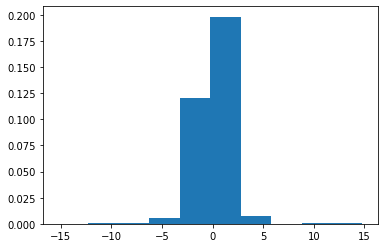

In [0]:
#Check for normality in the log returns
plt.hist(stock_percent_change[1:], density= True)

In [0]:
#Using Scipy to get more info like skweness, Kurtosis
stats.describe(stock_percent_change[1:])

DescribeResult(nobs=2012, minmax=(-15.263954125734719, 14.799306761374467), mean=0.05152084985735028, variance=2.3388511404729107, skewness=-0.20376391789184864, kurtosis=16.77099593547726)

>--For investors, the high kurtosis of the return distribution(16.64) implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk.

>--The kurtosis isn't close to 0, so a normal distribution for the returns is not assumed

In [0]:
print('CISCO : ', stats.kurtosistest(stock_percent_change[1:]))

CISCO :  KurtosistestResult(statistic=21.666739977990037, pvalue=4.2263992121512894e-104)


>CISCO :  KurtosistestResult(statistic=21.6296870467075, pvalue=9.442157604570577e-104)

>--Since the Z value is 21.63 which is higher than 1.96, it leads us to conclude that we're not seeing Kurtosis from a normal distribution

>--since the pvalue is <0.05, we reject the null hypothesis, that is, the kurtosis is not from a normal distribution --There is a very low probability (<0.05) that we're seeing these results from a random chance.

####**Stocks Fundamental Data**

In [0]:
!pip install yfinance

In [0]:
CISCO = yf.Ticker("CSCO")

#####**Key Ratios**

In [0]:
# get price to book
pb = CISCO.info['priceToBook']
print('Price to Book Ratio is: %.2f' % pb)

Price to Book Ratio is: 5.88


#####**Options Data**

In [0]:
pip install nsepy

In [0]:
from datetime import date
from nsepy import get_history
stock_opt = get_history(symbol="CSCO",
 start=date(2019, 1, 15),
 end=date(2019, 2, 1),
 option_type="CE",
 strike_price=2000,
 expiry_date=date(2019, 2, 28))
stock_opt.head()

**Analyze performance**

####Visualization and Analysis

In [0]:
# Install pyfolio if not already installed
!pip install pyfolio

In [0]:
import pyfolio as pf

In [0]:
# Define the ticker list
tickers_list = ['CSCO']
# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns=tickers_list)
# Feth the data
import yfinance as yf
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
# Compute the returns of individula stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data = data.pct_change().dropna().mean(axis=1)
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Date
2014-12-22    0.016205
2014-12-23    0.001063
2014-12-24    0.001770
2014-12-26    0.001767
2014-12-29    0.003880
dtype: float64

Start date,2014-12-22
End date,2019-12-18
Total months,59
,Backtest
Annual return,14.5%
Cumulative returns,96.6%
Annual volatility,22.5%
Sharpe ratio,0.71
Calmar ratio,0.59
Stability,0.90
Max drawdown,-24.5%


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.46,2019-07-15,2019-12-05,NaT,NaN
1,23.08,2015-03-02,2016-02-10,2016-05-31,327
2,17.48,2018-10-03,2018-12-24,2019-02-15,98
3,10.86,2017-05-05,2017-08-18,2017-10-20,121
4,9.97,2018-03-12,2018-04-02,2018-05-04,40


Stress Events,mean,min,max
Fall2015,-0.30%,-4.84%,4.31%
New Normal,0.06%,-8.61%,9.64%


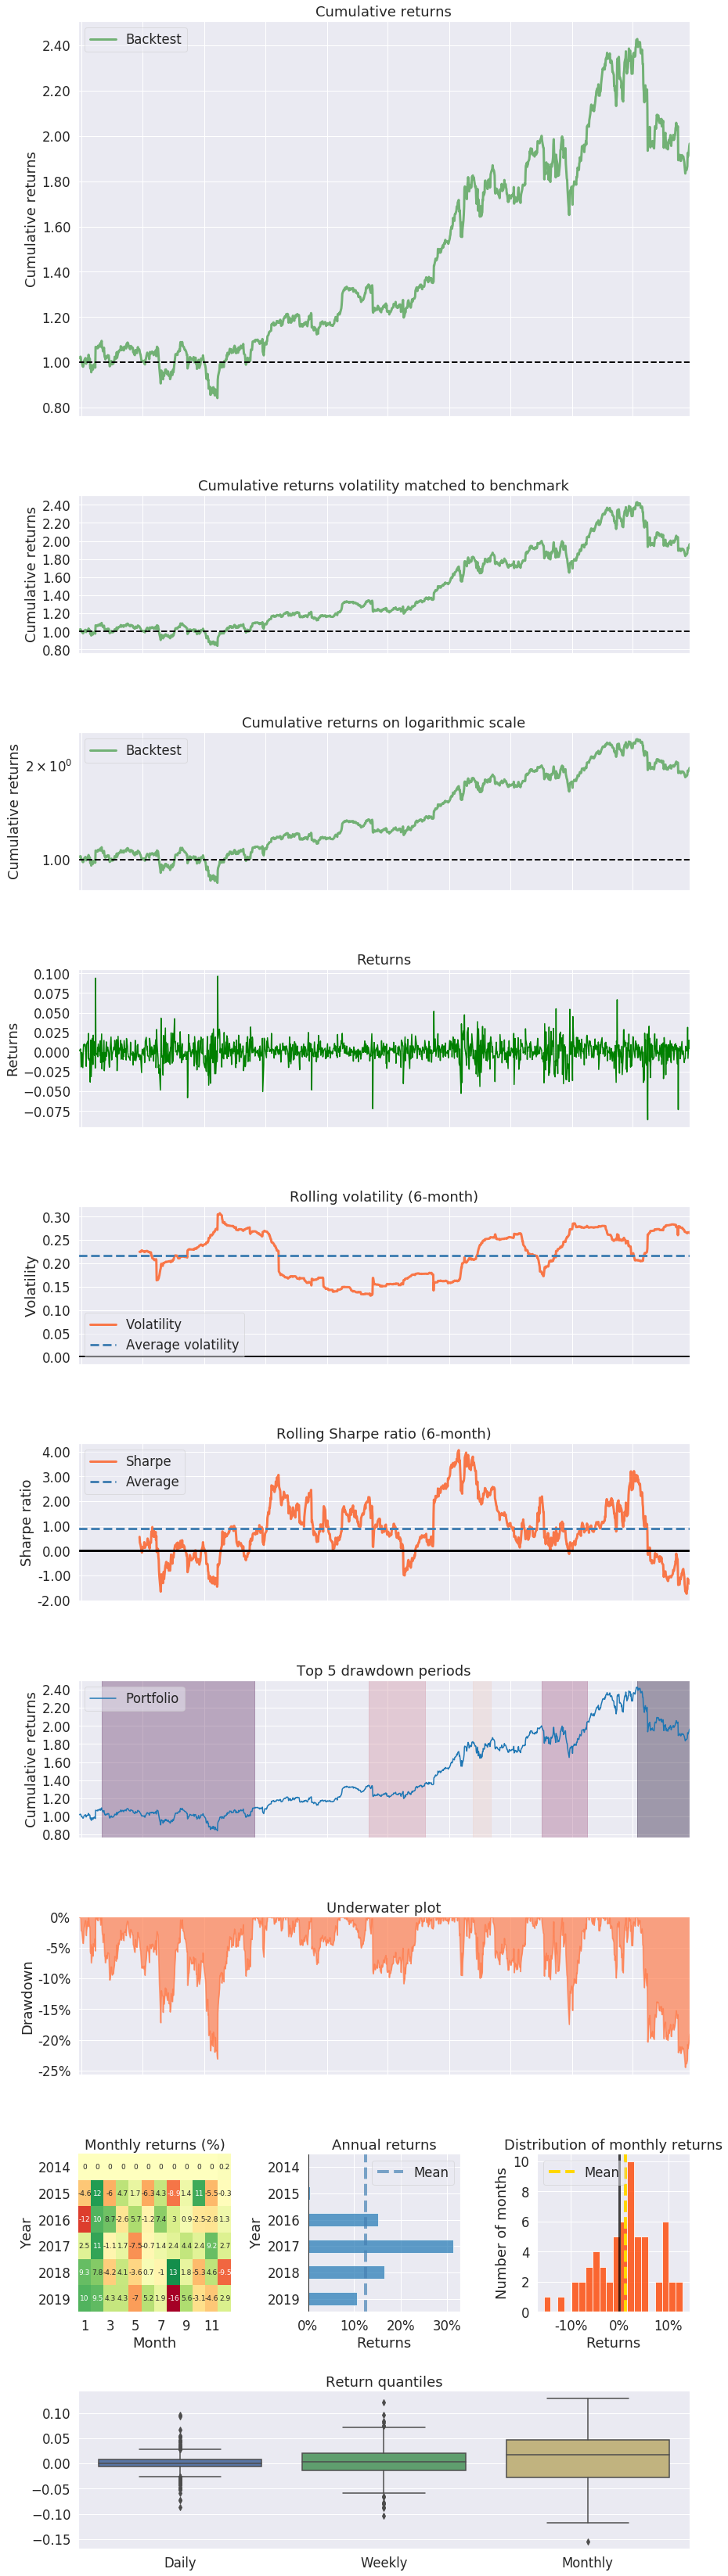

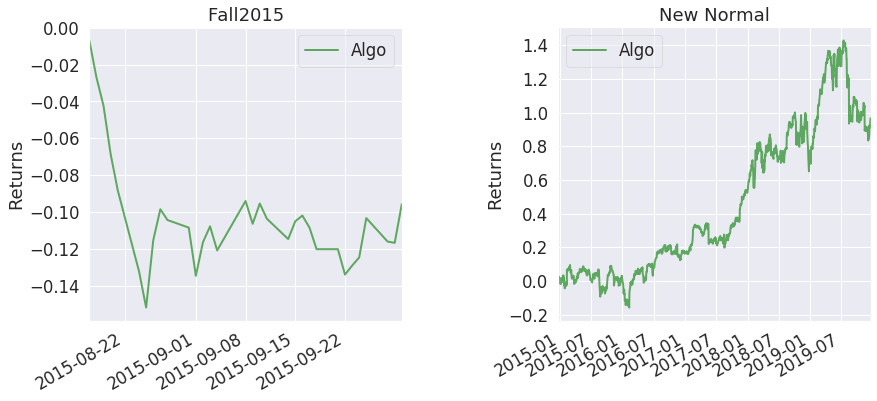

In [0]:
pf.create_full_tear_sheet(data)

###**Portfolio Value at Risk(VaR)**

In [39]:
import datetime
import numpy as np
from pandas_datareader import data
from scipy.stats import norm


def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.
    """
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

if __name__ == "__main__":
    start = datetime.datetime(2010, 1, 1)
    end = datetime.datetime(2019, 12, 19)

    citi = stock_data
    citi["rets"] = citi["Adj Close"].pct_change()

    P = 1e6   # 1,000,000 USD
    c = 0.99  # 99% confidence interval
    mu = np.mean(citi["rets"])
    sigma = np.std(citi["rets"])

    var = var_cov_var(P, c, mu, sigma)
    print (f"Value-at-Risk: {var}")

Value-at-Risk: 34946.235183738754


##**Volatility**

                 High        Low       Open  ...  Adj Close   Log_Ret  Volatility
Date                                         ...                                 
2018-11-26  45.639999  45.090000  45.139999  ...  44.317894  0.022862    0.242818
2018-11-27  46.389999  45.209999  45.450001  ...  44.852783  0.011997    0.242887
2018-11-28  47.480000  46.119999  46.299999  ...  45.990639  0.025052    0.243078
2018-11-29  47.759998  46.900002  46.900002  ...  46.039261  0.001057    0.242960
2018-11-30  47.910000  46.919998  47.270000  ...  46.554695  0.011133    0.243105
2018-12-03  48.790001  48.080002  48.320000  ...  47.400795  0.018011    0.243601
2018-12-04  49.139999  47.250000  48.700001  ...  46.048985 -0.028933    0.245426
2018-12-06  48.459999  46.470001  46.990002  ...  47.060413  0.021726    0.246017
2018-12-07  48.490002  46.360001  48.160000  ...  45.163986 -0.041132    0.249597
2018-12-10  47.130001  45.820000  46.299999  ...  45.572453  0.009003    0.249728
2018-12-11  47.9

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd86d34eb8>,
      dtype=object)

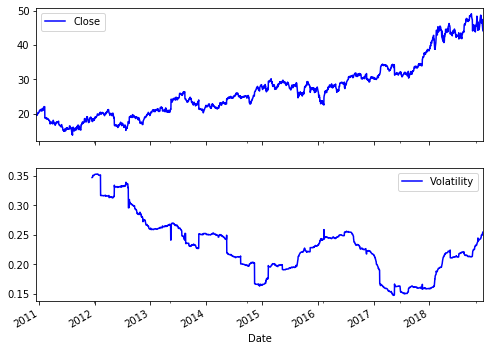

In [0]:
## Computing Volatility

# Compute the logarithmic returns using the Closing price 
stock_data['Log_Ret'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
stock_data['Volatility'] = pd.Series(stock_data['Log_Ret']).rolling(window=252).std() * np.sqrt(252)

print(stock_data.tail(15))
# Plot the CISCO Price series and the Volatility
stock_data[['Adj Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

###**Measures of risk adjusted return based on volatility**

####Sharpe ratio

>Sharpe ratio = (Mean return − Risk-free rate) / Standard deviation of return

In [0]:
# Sharpe Ratio 
def sharpe(returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days) 
    sharpe_ratio = (returns.mean() - rf) / volatility
    return sharpe_ratio

##**Indicators**

###**RSI**

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdd
import pyEX as p

ticker = 'CSCO'
timeframe = '1y'

df = p.chartDF(ticker, timeframe)
df = df[['Open']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']

delta = df.y.diff().dropna()
u = delta * 0
d = u.copy()
u[delta > 0] = delta[delta > 0]
d[delta < 0] = -delta[delta < 0]
u[u.index[14-1]] = np.mean( u[:14]) 
u = u.drop(u.index[:(14-1)])
d[d.index[14-1]] = np.mean( d[:14]) 
d = d.drop(d.index[:(14-1)])
rs = pdd.stats.moments.ewma(u, com=14-1, adjust=False) / \
pdd.stats.moments.ewma(d, com=14-1, adjust=False)
rsi = 100 - 100 / (1 + rs)

plt.plot(df.ds, rsi, label='CISCO RSI', color='orange')
plt.legend(loc='upper left')
plt.show()

###**Simple Moving Average Strategy**

**Feature Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
scaled_data = sc.fit_transform(reshaped_stock_data_open)

In [0]:
def timestamp(n_period, scaled_data):
    x_train = [] 
    y_train = [] #1 output to predict

    for i in range(n_period,len(scaled_data)):
        x_train.append(scaled_data[i-n_period:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    #reshaping
    x_train_ = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train_, x_train, y_train

In [0]:
x_train_, x_train, y_train = timestamp(60, scaled_data)

#**Part 2 - Model Identification**

##**Decision Tree (Regression)**

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
decision_tree_regr = BaggingRegressor(dt, n_estimators=10, random_state=0)
decision_tree_regr.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

##**Recurrent Neural Network (RNN)**

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
#Importing the keras libraries and packages
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras import Sequential

In [0]:
regressor = Sequential()

#Adding the first LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
x_train.shape[1]

60

In [0]:
#Adding the second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the output layer
regressor.add(Dense(units=1))

In [0]:
#compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#fitting the RNN to the training set
regressor.fit(x_train_, y_train, epochs=50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1953 samples
Epoch 1/50
1953/1953 [==============================] - 34s 17ms/sample - loss: 0.0184
Epoch 2/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0031
Epoch 3/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0031
Epoch 4/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0027
Epoch 5/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0033
Epoch 6/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0030
Epoch 7/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0026
Epoch 8/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0023
Epoch 9/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0035
Epoch 10/50
1953/1953 [==============================] - 27s 14ms/sample - loss: 0.0024
Epoch 11/50
1

**Save the model**

In [0]:
regressor = regressor.save("regressor.h5")

**Load the model**

In [0]:
from tensorflow.python.keras.models import load_model

regressor = load_model("regressor.h5")

##**Making the predictions and visualising the results**

In [0]:
# Getting the real/test stock price of 2019
test_stock_data = pdr.get_data_yahoo(SELECTED_STOCK, start = '2018-12-18', end = '2019-12-17')
real_stock_price = test_stock_data.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((stock_data['Open'], test_stock_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_stock_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60, 310): #80 because we're predicting 20 records
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #retranform the output because our input data was scaled between 0 and 1.

Text(0.5, 1.0, 'CISCO Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'CISCO Stock Price')

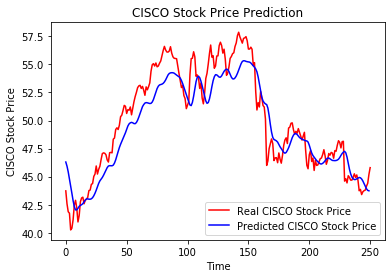

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real CISCO Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted CISCO Stock Price')
plt.title('CISCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CISCO Stock Price')
plt.legend()
plt.show()